## Comparison of theory & SLiM simulations in non-spatial case

Maggie Steiner
2/6/24

### Non-spatial case - theory

In our model, sampling uniformly is equivalent to sampling from a panmictic population (as we focus on rare alleles and assume they do not interact). In this case, the spatial derivatives become zero and the PDE we solve reduces to an ODE. 

Parameters:
* total population size ($N$)
* selection coefficient (per generation) ($s$)
* mutation rate (per generation) ($\mu$)

We find that, following notation in our derivations, the MGF of $P$ (prob. any particular sampled allele is deleterious) can be written as:
$$
\text{MGF}_P(z)=\left(1-\frac{z}{sN}\right)^{-\mu N}
$$
What remains is to use the relationship between $\text{MGF}_P$ and $\text{MGF}_K$ we derive to obtain an expression for the SFS entries for a uniform sample of finite size $n$.

From Eq. 13:
$$
\text{MGF}_K(z)=\text{MGF}_P(n(e^z-1))
$$

Following through, we arrive at:
$$
K\sim\text{NB}\left(\mu N,\frac{sN}{sN+n}\right)
$$

### Non-spatial case - simulations

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [8.0,6.0]

In [7]:
### read in data
df = pd.read_csv('sfs_summaries/compiled_nonspatial_panmictic_W75_K5_sfs.tsv',delimiter='\t')

In [10]:
df

,s,width,allele counts,se_f,f,n,f_per_kb
0,-0.1,0.000000,1.000000,0.000000,0.000000,14,0.000000e+00
1,-0.1,0.000000,1.106339,11.705701,330.232143,14,3.302321e-03
2,-0.1,0.000000,1.354142,0.000000,0.000000,14,0.000000e+00
3,-0.1,0.000000,1.657450,0.000000,0.000000,14,0.000000e+00
4,-0.1,0.000000,2.028693,6.128735,122.623571,14,1.226236e-03
...,...,...,...,...,...,...,...
10245,5.0,9.797959,8054.478842,0.000223,0.000088,14,8.764242e-10
10246,5.0,9.797959,9858.561895,0.000000,0.000000,14,0.000000e+00
10247,5.0,9.797959,12066.732626,0.000000,0.000000,14,0.000000e+00
10248,5.0,9.797959,14769.500645,0.000000,0.000000,14,0.000000e+00


In [17]:
s_list_sim = df['s'].unique() # 5 should be -1e-5
s_list_sim[4] =-1e-5
s_list_sim

array([-1.e-01, -1.e-02, -1.e-03, -1.e-04, -1.e-05])

In [62]:
w_list_sim = df['width'].unique()
w_plot = [w_list_sim[1],w_list_sim[9],w_list_sim[-5]]
w_plot

[1.224744871391589, 19.595917942265423, 48.98979485566356]

<ipython-input-43-876b7ec17f49>:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[i].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[j], label=str(s_list_sim[j]), marker='o',linestyle='dashed')
<ipython-input-43-876b7ec17f49>:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[i].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[j], label=str(s_list_sim[j]), marker='o',linestyle='dashed')


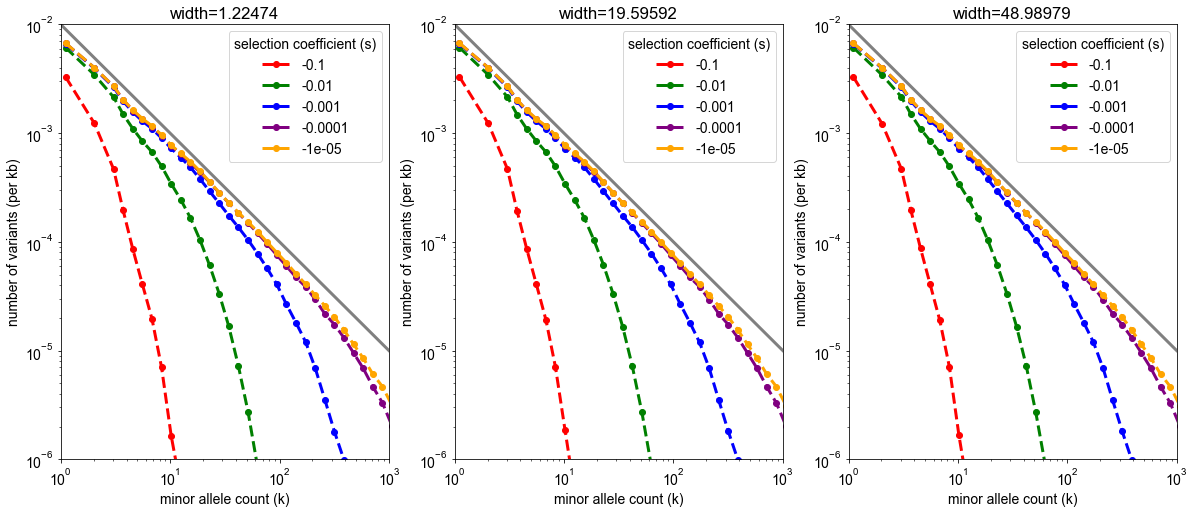

In [43]:
fig, axs = plt.subplots(1,len(w_plot),figsize=(20,8))
colors = ['red','green','blue','purple','orange']
x = np.logspace(0,3,100)
y = 10**(-1*np.log10(x)) * 1e-2
for i in range(len(w_plot)):
    for j in range(len(s_list_sim)):
        if s_list_sim[j]!=-1e-5:
            sfs_data = df[df['s']==s_list_sim[j]]
            sfs_temp = sfs_data[sfs_data['width'] == w_plot[i]]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[i].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[j], label=str(s_list_sim[j]), marker='o',linestyle='dashed')
        else:
            sfs_data = df[df['s']==5.0]
            sfs_temp = sfs_data[sfs_data['width'] == w_plot[i]]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[i].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[j], label=str(s_list_sim[j]), marker='o',linestyle='dashed')
    
    axs[i].loglog(x,y,color='gray')
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_ylim(1e-6, 1e-2)
    axs[i].set_xlim(1e0,1e3)
    axs[i].set_xlabel("minor allele count (k)")
    axs[i].set_ylabel("number of variants (per kb)")
    axs[i].set_title("width="+str(round(w_plot[i],5)))
    axs[i].legend(title="selection coefficient (s)")

*Notes*
* Grey line is slope -1 (neutral case) - sanity check that lines approach this as selection becomes weaker
* y-intercept should reflect mutational input - why is it lower for s=0.1?

<ipython-input-48-9cfe541f3827>:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
<ipython-input-48-9cfe541f3827>:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


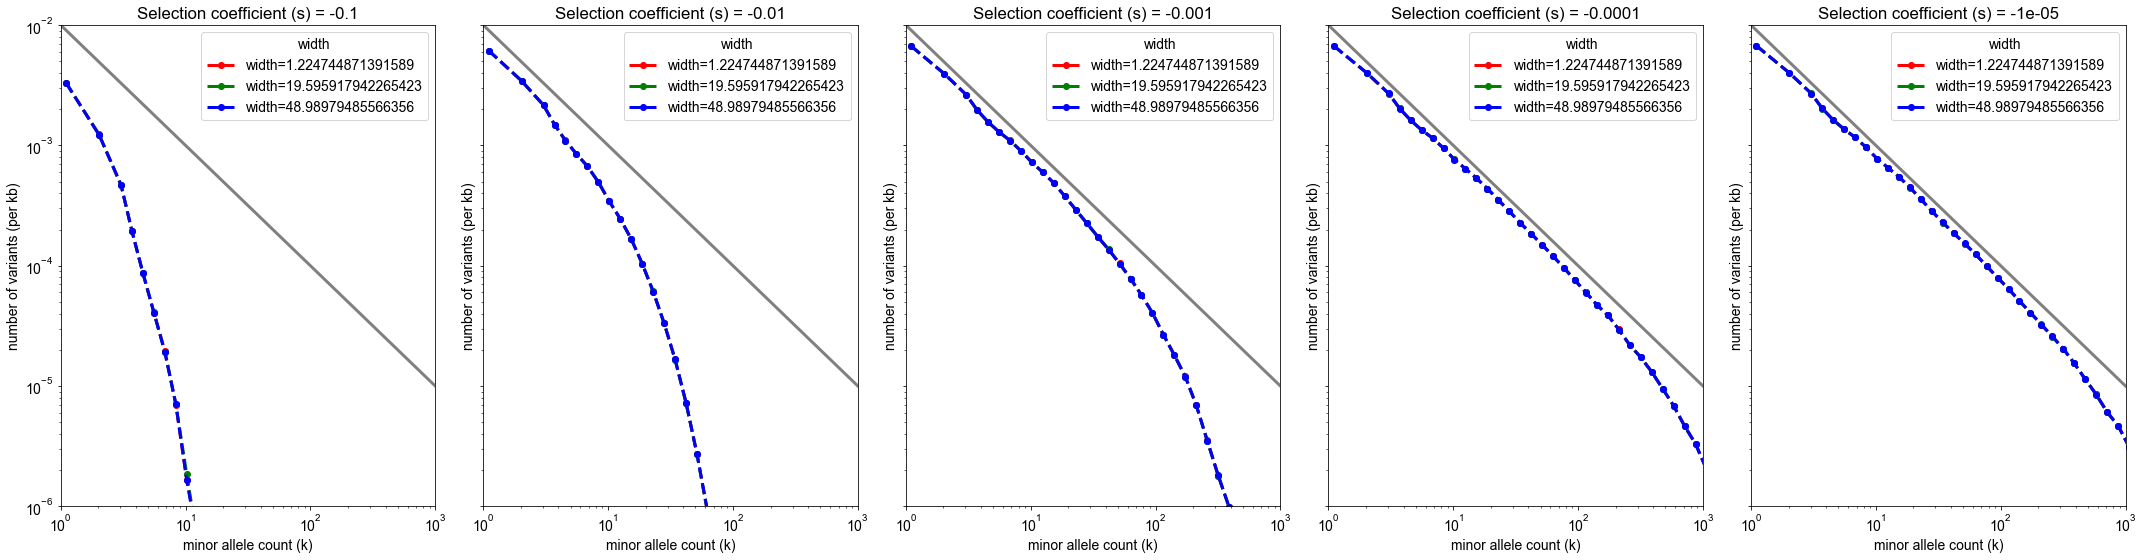

In [48]:
fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']
x = np.logspace(0, 3, 100)

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        if s_coefficient != -1e-5:
            sfs_data = df[df['s'] == s_coefficient]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        else:
            sfs_data = df[df['s'] == 5.0]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')

    # Plot the line with slope -1 and y-intercept 1e-2
    axs[j].loglog(x, y, color='gray')

    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-6, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")

# Adjust layout
plt.tight_layout()
plt.show()


*Notes*
* No variation with sampling widths - good!

### Comparison to theory

In [73]:
from scipy.special import loggamma
def finite_sfs_k_unif(k,n,s,mu,N):
    gammae = -1*s*N
    thetae = mu*N
    logval = k*np.log(n)+thetae*np.log(gammae)-(k+thetae)*np.log(n+gammae)+loggamma(k+thetae)-loggamma(k+1)-loggamma(thetae)
    return(np.e**logval)

# from scipy.stats import nbinom

<ipython-input-113-3a250c142ae0>:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
<ipython-input-113-3a250c142ae0>:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


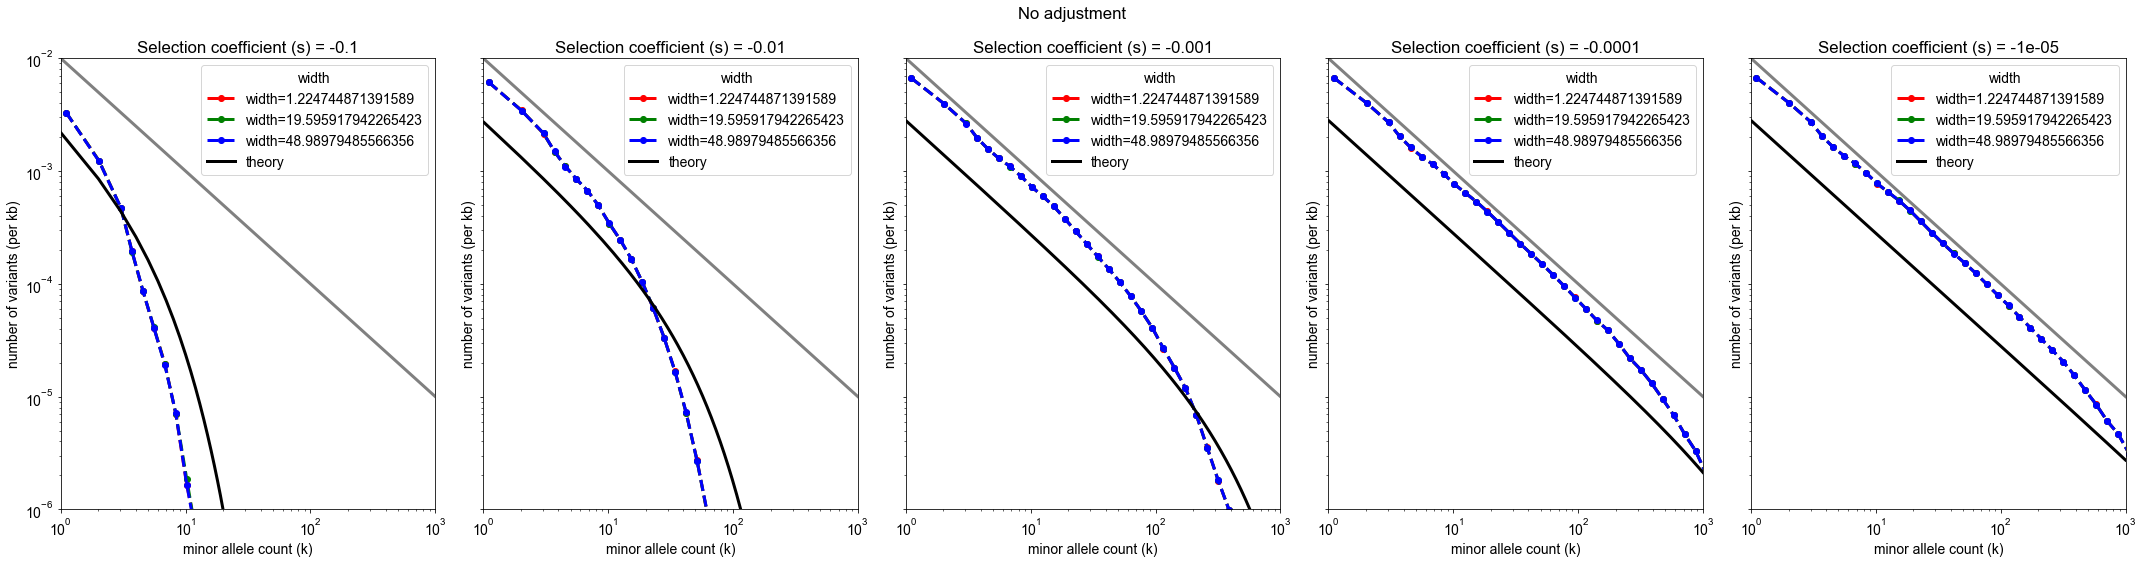

In [113]:
mu = 1e-10
N = 75*75*5 #80000
# N = 80000
n = 10000
kmax = 1000
step = 1

adj_factor = 1 # no adjustment

fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']
x = np.logspace(0, 3, 100)

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        if s_coefficient != -1e-5:
            sfs_data = df[df['s'] == s_coefficient]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        else:
            sfs_data = df[df['s'] == 5.0]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')

    # Plot the line with slope -1 and y-intercept 1e-2
    axs[j].loglog(x, y, color='gray')

    # Plot theory line
    sfs_th = [finite_sfs_k_unif(k,n,s_coefficient*adj_factor,mu*adj_factor,N)*1e3 for k in range(0, kmax, step)]
    axs[j].plot(range(0, kmax, step), sfs_th, label="theory", marker='none', color='black')

        
    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-6, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")    
    
fig.suptitle("No adjustment")
# Adjust layout
plt.tight_layout()
plt.show()


*Notes*
* get a match when Ns and Nmu bigger - increase N or increase s/mu
* doesn't make sense to increase N - has max capacity defined in model
* try adjusting s and mu - we think there is a time scaling issue

### adjust mu and s by a constant factor

<ipython-input-110-ed42506d15d4>:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
<ipython-input-110-ed42506d15d4>:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


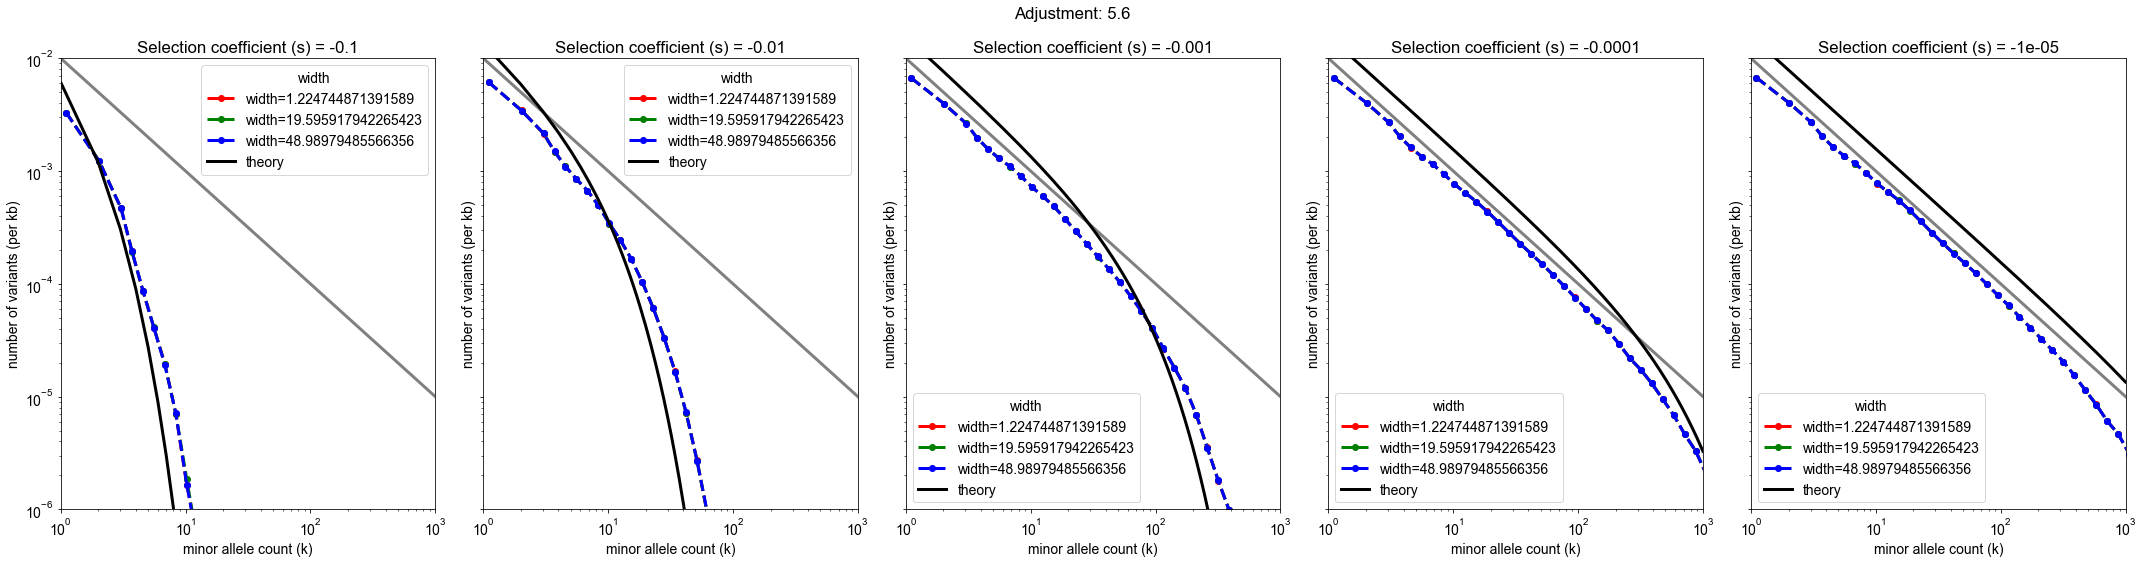

In [110]:
mu = 1e-10
N = 75*75*5 #80000
# N = 80000
n = 10000
kmax = 1000
step = 1

adj_factor = 5.6

fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']
x = np.logspace(0, 3, 100)

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        if s_coefficient != -1e-5:
            sfs_data = df[df['s'] == s_coefficient]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        else:
            sfs_data = df[df['s'] == 5.0]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')

    # Plot the line with slope -1 and y-intercept 1e-2
    axs[j].loglog(x, y, color='gray')

    # Plot theory line
    sfs_th = [finite_sfs_k_unif(k,n,s_coefficient*adj_factor,mu*adj_factor,N)*1e3 for k in range(0, kmax, step)]
    axs[j].plot(range(0, kmax, step), sfs_th, label="theory", marker='none', color='black')

        
    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-6, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")    
    
fig.suptitle("Adjustment: "+str(adj_factor))
# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-111-7c2022286991>:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
<ipython-input-111-7c2022286991>:25: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')


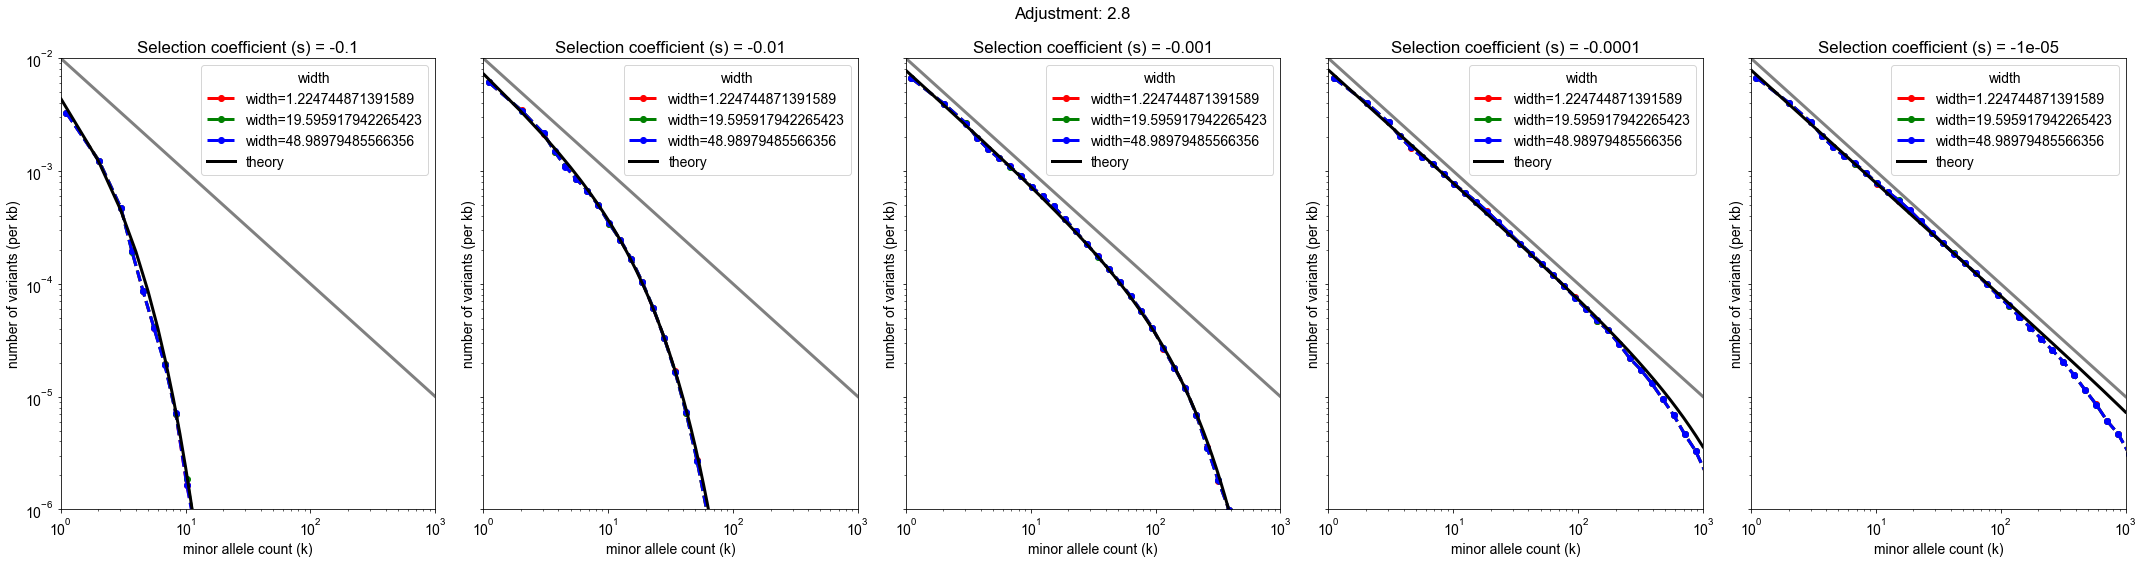

In [111]:
mu = 1e-10
N = 75*75*5 #80000
# N = 80000
n = 10000
kmax = 1000
step = 1

adj_factor = 2.8 # 5.6/2 ???

fig, axs = plt.subplots(1,len(s_list_sim), figsize=(30, 8), sharex=True, sharey=True)
colors = ['red', 'green', 'blue', 'purple', 'orange']
x = np.logspace(0, 3, 100)

for j, s_coefficient in enumerate(s_list_sim):
    for i, width in enumerate(w_plot):
        if s_coefficient != -1e-5:
            sfs_data = df[df['s'] == s_coefficient]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')
        else:
            sfs_data = df[df['s'] == 5.0]
            sfs_temp = sfs_data[sfs_data['width'] == width]
            sfs_temp = sfs_temp[sfs_temp['f_per_kb'] != 0]
            axs[j].plot(sfs_temp['allele counts'][0:], sfs_temp['f_per_kb'], color=colors[i], label=f'width={width}', marker='o', linestyle='dashed')

    # Plot the line with slope -1 and y-intercept 1e-2
    axs[j].loglog(x, y, color='gray')

    # Plot theory line
    sfs_th = [finite_sfs_k_unif(k,n,s_coefficient*adj_factor,mu*adj_factor,N)*1e3 for k in range(0, kmax, step)]
    axs[j].plot(range(0, kmax, step), sfs_th, label="theory", marker='none', color='black')

        
    axs[j].set_xscale("log")
    axs[j].set_yscale("log")
    axs[j].set_ylim(1e-6, 1e-2)
    axs[j].set_xlim(1e0, 1e3)
    axs[j].set_xlabel("minor allele count (k)")
    axs[j].set_ylabel("number of variants (per kb)")
    axs[j].set_title(f"Selection coefficient (s) = {s_coefficient}")
    axs[j].legend(title="width")    

fig.suptitle("Adjustment: "+str(adj_factor))
# Adjust layout
plt.tight_layout()
plt.show()